# Variational Autoencoder

Combines all incomplete datasets and generate from 2019-2023

https://github.com/clementchadebec/pyraug

https://github.com/matthewvowels1/Awesome-VAEs

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving VAE_files.zip to VAE_files.zip


In [ ]:
import zipfile
import os
import pandas as pd
from functools import reduce

# Unzip the uploaded ZIP file
with zipfile.ZipFile("/content/VAE_files.zip", "r") as zip_ref:
    zip_ref.extractall("VAE_files")

# Change working directory to the extracted folder
os.chdir("VAE_files")

In [ ]:
# 1. Load each raw file, parsing its date column
asia        = pd.read_csv("VAE_files/asia_pacific_prices.csv", parse_dates=["Date"])
fax_annual  = pd.read_csv("VAE_files/fax_annual.csv",       parse_dates=["Date"]).rename(columns={"AirFreightRate":"AirFreightRate_Annual"})
fax_weekly  = pd.read_csv("VAE_files/fax_weekly.csv",       parse_dates=["Date"]).rename(columns={"AirFreightRate":"AirFreightRate_Weekly"})
diesel      = pd.read_csv("VAE_files/dieselprice.csv",      parse_dates=["date"]).rename(columns={"date":"Date"})

dfs = [asia, fax_annual, fax_weekly, diesel]
raw_merged = reduce(lambda l, r: pd.merge(l, r, on="Date", how="outer"), dfs)
raw_merged = raw_merged.sort_values("Date").reset_index(drop=True)

raw_merged.to_csv("raw_merged_unfiltered.csv", index=False)
display(raw_merged.head(10))

,Date,AsiaPacific,AsiaPacific_rescaled,AirFreightRate_Annual,AirFreightRate_Weekly,series_type,ron95,ron97,diesel,diesel_eastmsia
0,2017-03-30,NaN,NaN,NaN,NaN,level,2.13,2.41,2.11,2.11
1,2017-04-06,NaN,NaN,NaN,NaN,level,2.16,2.43,2.08,2.08
2,2017-04-06,NaN,NaN,NaN,NaN,change_weekly,0.03,0.02,-0.03,-0.03
3,2017-04-13,NaN,NaN,NaN,NaN,level,2.24,2.52,2.16,2.16
4,2017-04-13,NaN,NaN,NaN,NaN,change_weekly,0.08,0.09,0.08,0.08
5,2017-04-20,NaN,NaN,NaN,NaN,level,2.27,2.54,2.21,2.21
6,2017-04-20,NaN,NaN,NaN,NaN,change_weekly,0.03,0.02,0.05,0.05
7,2017-04-27,NaN,NaN,NaN,NaN,level,2.21,2.49,2.14,2.14
8,2017-04-27,NaN,NaN,NaN,NaN,change_weekly,-0.06,-0.05,-0.07,-0.07
9,2017-05-04,NaN,NaN,NaN,NaN,level,2.11,2.39,2.08,2.08


In [ ]:
# 2. Outer-join them all on Date
dfs = [asia, fax_annual, fax_weekly, diesel]
raw_merged = reduce(lambda left, right: pd.merge(left, right, on="Date", how="outer"), dfs)

In [ ]:
# 3. Sort by time and reset index
raw_merged = raw_merged.sort_values("Date").reset_index(drop=True)

In [ ]:
# 4. Inspect & save
raw_merged.to_csv("raw_merged_unfiltered.csv", index=False)

# Preview data nicely
from IPython.display import display
display(raw_merged.head(10))

,Date,AsiaPacific,AsiaPacific_rescaled,AirFreightRate_Annual,AirFreightRate_Weekly,series_type,ron95,ron97,diesel,diesel_eastmsia
0,2017-03-30,NaN,NaN,NaN,NaN,level,2.13,2.41,2.11,2.11
1,2017-04-06,NaN,NaN,NaN,NaN,level,2.16,2.43,2.08,2.08
2,2017-04-06,NaN,NaN,NaN,NaN,change_weekly,0.03,0.02,-0.03,-0.03
3,2017-04-13,NaN,NaN,NaN,NaN,level,2.24,2.52,2.16,2.16
4,2017-04-13,NaN,NaN,NaN,NaN,change_weekly,0.08,0.09,0.08,0.08
5,2017-04-20,NaN,NaN,NaN,NaN,level,2.27,2.54,2.21,2.21
6,2017-04-20,NaN,NaN,NaN,NaN,change_weekly,0.03,0.02,0.05,0.05
7,2017-04-27,NaN,NaN,NaN,NaN,level,2.21,2.49,2.14,2.14
8,2017-04-27,NaN,NaN,NaN,NaN,change_weekly,-0.06,-0.05,-0.07,-0.07
9,2017-05-04,NaN,NaN,NaN,NaN,level,2.11,2.39,2.08,2.08


#VAE Preprocessing

In [ ]:
!pip install pytorch-lightning==2.2.5 torch scikit-learn pandas matplotlib seaborn openpyxl joblib --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.3/802.3 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.9/981.9 kB 62.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer  # 👈 Add this line first
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("whitegrid")

In [ ]:
# -- Load your main macro dataset --
df = pd.read_csv('/content/VAE_files/raw_merged_unfiltered.csv', parse_dates=['Date'])
df = df.drop_duplicates(subset='Date').sort_values('Date').set_index('Date')
df = df.select_dtypes(include=['float64', 'int64'])

# -- Impute missing values --
imputer = IterativeImputer(max_iter=10, random_state=0)
monthly_filled = pd.DataFrame(imputer.fit_transform(df), columns=df.columns, index=df.index)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
months = monthly_filled.index.to_series().dt.month
monthly_filled['sin_month'] = np.sin(2 * np.pi * months / 12)
monthly_filled['cos_month'] = np.cos(2 * np.pi * months / 12)

In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader, random_split

# Convert scaled data to tensor
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

# Split into train and validation sets
X_train, X_val = train_test_split(X_tensor, test_size=0.2, random_state=42)

train_ds = TensorDataset(X_train)
val_ds = TensorDataset(X_val)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)


In [ ]:
# -- Create lag features for time-aware VAE (2 lags: t, t-1, t-2) --
max_lag = 2
lagged = []
for lag in range(max_lag + 1):
    shifted = monthly_filled.shift(lag)
    shifted.columns = [f"{col}_lag{lag}" for col in shifted.columns]
    lagged.append(shifted)
df_lagged = pd.concat(lagged, axis=1).dropna()
print('Lagged shape:', df_lagged.shape)

Lagged shape: (643, 30)


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_lagged)
import joblib
joblib.dump(scaler, 'minmax_scaler.joblib')
print("✅ Saved MinMaxScaler.")

✅ Saved MinMaxScaler.


In [ ]:
class TimeSeriesDataset(Dataset):
    def __init__(self, array):
        self.data = torch.tensor(array, dtype=torch.float32)
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

vae_dataset = TimeSeriesDataset(X_scaled)
vae_loader = DataLoader(vae_dataset, batch_size=16, shuffle=True)

In [ ]:
class TimeSeriesVAE(pl.LightningModule):
    def __init__(self, input_dim, latent_dim=8, lr=1e-3, beta=0.01):
        super().__init__()
        self.save_hyperparameters()

        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        self.fc_mu = nn.Linear(32, latent_dim)
        self.fc_logvar = nn.Linear(32, latent_dim)

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim)  # ⚠️ NO ReLU to allow negative values
        )

    def forward(self, x):
        z_encoded = self.encoder(x)
        mu = self.fc_mu(z_encoded)
        logvar = self.fc_logvar(z_encoded)
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        x_hat = self.decoder(z)
        return x_hat, mu, logvar

    def decode(self, z):
        return self.decoder(z)

    def training_step(self, batch, batch_idx):
        x = batch[0]
        x_hat, mu, logvar = self(x)
        recon_loss = F.mse_loss(x_hat, x, reduction='mean')
        kl_loss = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())
        loss = recon_loss + self.hparams.beta * kl_loss
        self.log("train/loss_total", loss, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x = batch[0]
        x_hat, mu, logvar = self(x)
        recon_loss = F.mse_loss(x_hat, x, reduction='mean')
        kl_loss = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())
        loss = recon_loss + self.hparams.beta * kl_loss
        self.log("val/loss_total", loss, on_epoch=True)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.hparams.lr)



In [ ]:
# Prepare dataset
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
dataset = TensorDataset(X_tensor)

# Split dataset (80% train, 20% val)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

In [ ]:
# Define model
input_dim = X_scaled.shape[1]
vae = TimeSeriesVAE(input_dim=input_dim, latent_dim=8, lr=1e-3, beta=0.01)

# TensorBoard logger
logger = TensorBoardLogger("lightning_logs", name="vae_model")

# Epoch loss history callback
epoch_losses = []
class LossHistory(pl.Callback):
    def on_train_epoch_end(self, trainer, pl_module):
        avg_loss = trainer.callback_metrics["train/loss_total"].item()
        epoch_losses.append(avg_loss)

In [ ]:
# Trainer
trainer = pl.Trainer(
    max_epochs=50,
    accelerator='auto',
    logger=logger,
    log_every_n_steps=1,
    callbacks=[loss_history]
)

# Fit model with validation
trainer.fit(vae, train_loader, val_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type       | Params
-----------------------------------------
0 | encoder   | Sequential | 4.1 K 
1 | fc_mu     | Linear     | 264   
2 | fc_logvar | Linear     | 264   
3 | decoder   | Sequential | 4.4 K 
-----------------------------------------
8.9 K     Trainable params
0         Non-trainable params
8.9 K     Total params
0.036     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


In [ ]:
# Custom callback to record manual epoch loss
class LossHistory(pl.Callback):
    def on_train_epoch_end(self, trainer, pl_module):
        avg_loss = trainer.callback_metrics["train/loss_total"].item()
        epoch_losses.append(avg_loss)

loss_history = LossHistory()

trainer.fit(vae, dataloader)

/usr/local/lib/python3.11/dist-packages/pytorch_lightning/trainer/configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:653: Checkpoint directory lightning_logs/vae_model/version_7/checkpoints exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type       | Params
-----------------------------------------
0 | encoder   | Sequential | 4.1 K 
1 | fc_mu     | Linear     | 264   
2 | fc_logvar | Linear     | 264   
3 | decoder   | Sequential | 4.4 K 
-----------------------------------------
8.9 K     Trainable params
0         Non-trainable params
8.9 K     Total params
0.036     Total estimated model params size (MB)
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


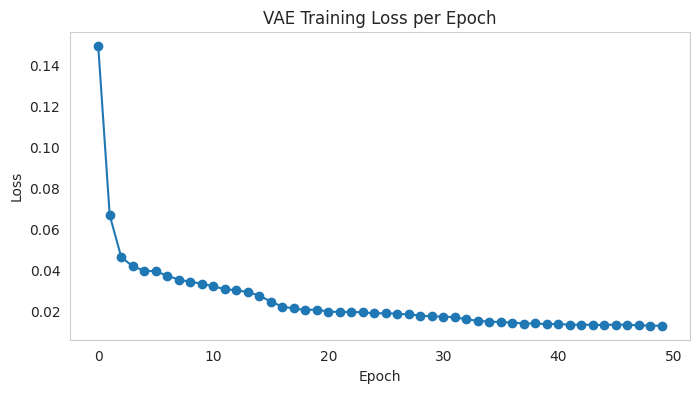

In [ ]:
# ---- Plot manual epoch loss curve ----
plt.figure(figsize=(8,4))
plt.plot(epoch_losses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("VAE Training Loss per Epoch")
plt.grid()
plt.show()

In [ ]:
# --- Generate samples ---
vae.eval()
n_samples = X_scaled.shape[0]

with torch.no_grad():
    z = torch.randn(n_samples, vae.hparams.latent_dim)
    X_gen_scaled = vae.decode(z).cpu().numpy()

# --- Inverse transform ---
X_gen = scaler.inverse_transform(X_gen_scaled)
X_real = scaler.inverse_transform(X_scaled)

# --- Convert to DataFrame ---
df_gen = pd.DataFrame(X_gen, columns=df_lagged.columns, index=df_lagged.index)
df_real = pd.DataFrame(X_real, columns=df_lagged.columns, index=df_lagged.index)

# --- Clip only specific columns (prices, etc.) ---
columns_to_clip = ['AsiaPacific_lag0', 'AsiaPacific_rescaled_lag0',
                   'AirFreightRate_Annual_lag0', 'AirFreightRate_Weekly_lag0',
                   'diesel_lag0', 'diesel_eastmsia_lag0']  # clip these to ≥ 0 only

df_gen[columns_to_clip] = df_gen[columns_to_clip].clip(lower=0)

# --- Compare side-by-side ---
df_compare = pd.concat([
    df_real.add_prefix("real_"),
    df_gen.add_prefix("gen_")
], axis=1)

display(df_compare.head(20))


,real_AsiaPacific_lag0,real_AsiaPacific_rescaled_lag0,real_AirFreightRate_Annual_lag0,real_AirFreightRate_Weekly_lag0,real_ron95_lag0,real_ron97_lag0,real_diesel_lag0,real_diesel_eastmsia_lag0,real_sin_month_lag0,real_cos_month_lag0,real_AsiaPacific_lag1,real_AsiaPacific_rescaled_lag1,real_AirFreightRate_Annual_lag1,real_AirFreightRate_Weekly_lag1,real_ron95_lag1,real_ron97_lag1,real_diesel_lag1,real_diesel_eastmsia_lag1,real_sin_month_lag1,real_cos_month_lag1,real_AsiaPacific_lag2,real_AsiaPacific_rescaled_lag2,real_AirFreightRate_Annual_lag2,real_AirFreightRate_Weekly_lag2,real_ron95_lag2,real_ron97_lag2,real_diesel_lag2,real_diesel_eastmsia_lag2,real_sin_month_lag2,real_cos_month_lag2,gen_AsiaPacific_lag0,gen_AsiaPacific_rescaled_lag0,gen_AirFreightRate_Annual_lag0,gen_AirFreightRate_Weekly_lag0,gen_ron95_lag0,gen_ron97_lag0,gen_diesel_lag0,gen_diesel_eastmsia_lag0,gen_sin_month_lag0,gen_cos_month_lag0,gen_AsiaPacific_lag1,gen_AsiaPacific_rescaled_lag1,gen_AirFreightRate_Annual_lag1,gen_AirFreightRate_Weekly_lag1,gen_ron95_lag1,gen_ron97_lag1,gen_diesel_lag1,gen_diesel_eastmsia_lag1,gen_sin_month_lag1,gen_cos_month_lag1,gen_AsiaPacific_lag2,gen_AsiaPacific_rescaled_lag2,gen_AirFreightRate_Annual_lag2,gen_AirFreightRate_Weekly_lag2,gen_ron95_lag2,gen_ron97_lag2,gen_diesel_lag2,gen_diesel_eastmsia_lag2,gen_sin_month_lag2,gen_cos_month_lag2
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-04-13,102.585517,102.585519,3.122463,3.122463,2.24,2.52,2.16,2.16,8.660254e-01,-0.500000,102.585517,102.585518,3.121267,3.121267,2.16,2.43,2.08,2.08,8.660254e-01,-0.500000,102.585503,102.585504,3.121152,3.121152,2.13,2.41,2.11,2.11,1.000000e+00,0.000000,103.846504,102.891029,4.052448,4.117751,11.780901,100.315895,25.864958,14.527047,0.037569,1.351532,104.920761,105.102310,3.132017,3.215274,3.843458,2.096839,1.365978,2.247596,0.014247,1.326149,104.473022,104.403755,4.030728,4.119203,11.953044,85.000534,25.464977,14.150268,-0.152116,1.211114
2017-04-20,102.585513,102.585514,3.122851,3.122851,2.27,2.54,2.21,2.21,8.660254e-01,-0.500000,102.585517,102.585519,3.122463,3.122463,2.24,2.52,2.16,2.16,8.660254e-01,-0.500000,102.585517,102.585518,3.121267,3.121267,2.16,2.43,2.08,2.08,8.660254e-01,-0.500000,102.715508,103.730446,3.138912,3.060899,3.166279,0.780130,1.737243,2.396523,-0.729259,1.259812,103.464653,105.208000,3.068623,3.090869,0.864303,20.270969,4.728097,0.985456,-0.728578,1.106300,106.257980,106.256454,3.188711,3.120902,0.838299,-7.737305,2.749843,1.131763,-0.746082,1.005241
2017-04-27,102.585515,102.585516,3.122084,3.122084,2.21,2.49,2.14,2.14,8.660254e-01,-0.500000,102.585513,102.585514,3.122851,3.122851,2.27,2.54,2.21,2.21,8.660254e-01,-0.500000,102.585517,102.585519,3.122463,3.122463,2.24,2.52,2.16,2.16,8.660254e-01,-0.500000,102.340919,103.572716,2.947590,3.005787,-0.501148,-21.756910,0.000000,0.000000,0.468547,-0.441151,103.182388,102.275520,3.118400,3.179937,2.411294,10.570360,0.874395,1.246538,0.540532,-0.363636,100.533653,102.522171,2.952104,2.895166,-1.115981,-12.788948,-1.996096,-1.356592,0.495980,-0.299330
2017-05-04,102.585505,102.585506,3.120842,3.120842,2.11,2.39,2.08,2.08,5.000000e-01,-0.866025,102.585515,102.585516,3.122084,3.122084,2.21,2.49,2.14,2.14,8.660254e-01,-0.500000,102.585513,102.585514,3.122851,3.122851,2.27,2.54,2.21,2.21,8.660254e-01,-0.500000,102.511429,102.097435,3.061828,3.049490,1.333341,1.032740,0.665103,1.439135,-0.714223,0.242857,102.342918,101.575531,3.069672,3.032780,1.363380,-13.367788,-0.994084,0.500362,-0.705980,0.214904,103.196114,101.187080,3.038190,3.071336,1.142286,-1.526846,0.524197,1.574538,-0.770391,0.191845
2017-05-11,102.585512,102.585513,3.119362,3.119362,2.01,2.29,1.95,1.95,5.000000e-01,-0.866025,102.585505,102.585506,3.120842,3.120842,2.11,2.39,2.08,2.08,5.000000e-01,-0.866025,102.585515,102.585516,3.122084,3.122084,2.21,2.49,2.14,2.14,8.660254e-01,-0.500000,102.418755,102.381630,2.782015,2.825440,-1.551779,-28.362688,0.000000,0.000000,0.541498,-0.548419,102.168747,10

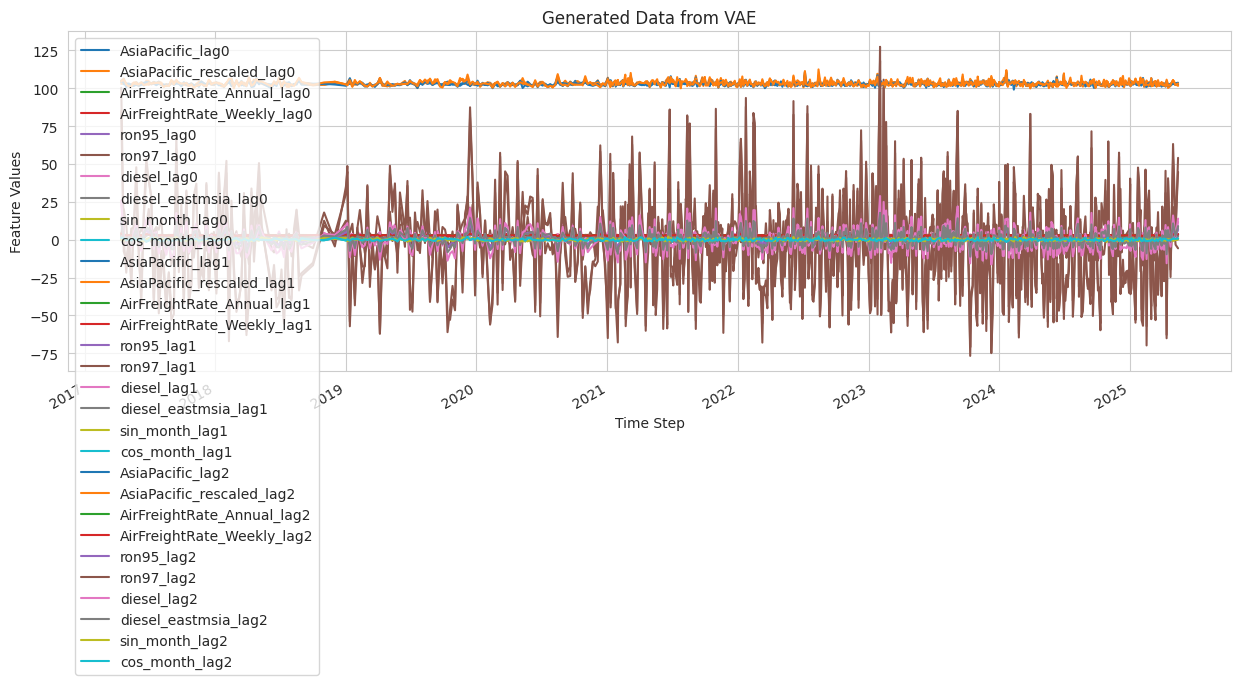

In [ ]:
import matplotlib.pyplot as plt

# Plot all columns
df_gen.plot(figsize=(15, 5), title="Generated Data from VAE")
plt.xlabel("Time Step")
plt.ylabel("Feature Values")
plt.grid(True)
plt.show()


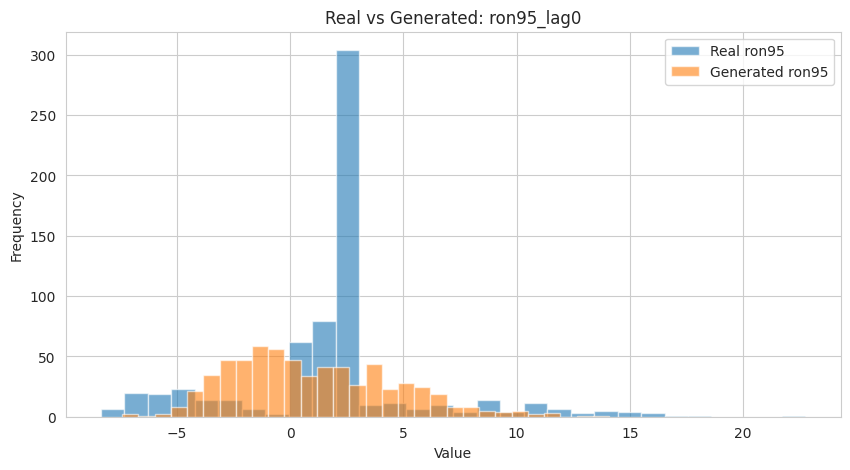

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df_real['ron95_lag0'], bins=30, alpha=0.6, label='Real ron95')
plt.hist(df_gen['ron95_lag0'], bins=30, alpha=0.6, label='Generated ron95')
plt.title("Real vs Generated: ron95_lag0")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df_gen.to_csv("vae_generated_dataset.csv")